# Hinge Function


In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = make_classification(n_classes=2, n_clusters_per_class=1, random_state=7,n_samples =400, n_informative=2, n_redundant= 0)

In [3]:
Y[Y==0] = -1


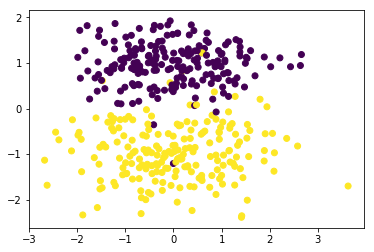

In [4]:
plt.scatter(X[:,0], X[:,1], c =Y)
plt.show()

In [9]:
class SVM:
    
    
    def __init__(self, C= 1.0):
        self.C = C
        self.b = 0
        self.W = 0
        
    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        loss+= 0.5*np.dot(W, W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W, X[i].T)+b)
            loss = loss + self.C*max(0,1-ti)
        
        return loss[0][0]
    
    
    def fit(self, X, Y, batch_size =100, learning_rate = 0.001, maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        W = np.zeros((1, no_of_features))
        bias = 0
        
        
        print(self.hingeLoss(W,bias,X,Y))
        
        
        losses = []
        
        
        for i in range(maxItr):
            
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            
            for batch_start in range(0, no_of_samples, batch_size):
                
                gradb = 0
                gradw = 0
                
                
                for j in range(batch_start, batch_start+batch_size):
                    
                    if j<no_of_samples:
                    
                        i = ids[j]
                        ti = Y[i]*(np.dot(W, X[i].T)+bias)
                        
                        if ti>1:
                            gradb+=0
                            gradw+=0
                        else:
                            gradw = c*Y[i]*X[i]
                            gradb = c*Y[i]
                            
                W = W -n*W +n*gradw
                bias = bias +n*gradb
        
        
        self.W = W
        self.b = bias
        
        return W, bias, losses
    

            

In [10]:
mySVM = SVM()

In [14]:
W, b, losses = mySVM.fit(X,Y, maxItr= 1000)

400.0


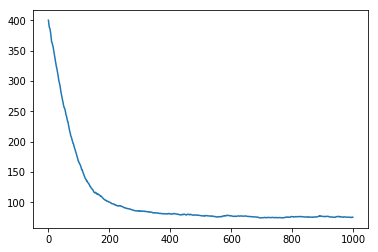

In [15]:
plt.plot(losses)

In [17]:
W, B = mySVM.W, mySVM.b
print(W, B)

[[ 0.01729724 -0.63190746 -0.01925507  0.01989976  0.42937214 -0.00983603
  -0.00811644  0.0294186  -0.00768557 -0.03566586 -0.00886274  0.00545456
  -0.02589746 -0.0369358   0.0159348  -0.00451421  0.02673998  0.00650445
   0.0050652  -0.03944394]] 0.030000000000000027


In [24]:
def plotHyperPlane(w1,w2, b):
    
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1 +b)/w2
     
    plt.plot(x1, x2)    
    plt.scatter(X[:,0], X[:,1], c =Y)
    plt.show()

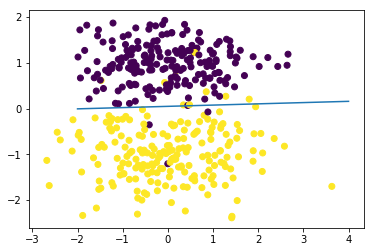

In [25]:
plotHyperPlane(W[0,0], W[0,1], B)